<a href="https://colab.research.google.com/github/jkranyak/birdscompetitionkaggle/blob/main/notebooka3489e63aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'birdclef-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F70203%2F8068726%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240411%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240411T234502Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D46e0e22533c4fcd389c01d0e4a59680f0195c48981d89b38fbcc56169788c4e2ec0cd598173d4b060798187fc098d9ae8be44f928e19332fd7a04dd9291b7cd5812e6ccb7a55cde8fb478dd218fbb7838d1668800383c690cadf71fdb848aef8fc877fe66aa901c88f53b367b5159910d89ce41d7d6e5efaa398ab4edb3a3698eb791cf66685b93ce0b06ccbe72381b605d5a1cd8666e4a5b0c3deed470d2e40bcebf7459e89a08001c6c206049a51e26d8448f234521076fa17a96a87092b56e9f57708917dce91638fcc740d304c9522406f9230270c574117522f32a1760132f49b58bdb9ccae232fd02fe940370249bd14d548dc193e0be81f80f0badebf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 23390009647 bytes downloaded
Downloaded and uncompressed: birdclef-2024
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1132784106.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1058803039.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2016683373.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/148271793.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2050892088.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/333096840.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2093097362.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1069318518.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1229853887.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/202720975.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2133074275.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/211191982.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2134313903.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1932516760.ogg
/kaggle/input/birdclef-2024/unlabeled_sound

In [3]:
!pip install librosa soundfile tensorflow scikit-learn numpy pandas matplotlib seaborn tqdm
!pip install audiomentations
!pip install tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 2.0 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import soundfile as sf
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, LSTM, TimeDistributed, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:

# Define output directories
output_directories = ['processed_data', 'models', 'submissions', 'visualizations']
base_working_dir = '/kaggle/working/'

# Creating subdirectories
for directory in output_directories:
    path = os.path.join(base_working_dir, directory)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

# Define base directories for input data
base_input_dir = "/kaggle/input/birdclef-2024"

# Paths for specific data types
train_audio_base_path = os.path.join(base_input_dir, "train_audio")
unlabeled_soundscapes_path = os.path.join(base_input_dir, "unlabeled_soundscapes")
train_metadata_csv_path = os.path.join(base_input_dir, "train_metadata.csv")
taxonomy_csv_path = os.path.join(base_input_dir, "eBird_Taxonomy_v2021.csv")
sample_submission_csv_path = os.path.join(base_input_dir, "sample_submission.csv")
test_soundscapes_path = os.path.join(base_input_dir, "test_soundscapes")

# Function to list all audio files considering subdirectories
def list_all_audio_files(base_path):
    all_files = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith('.ogg'):
                all_files.append(os.path.join(root, file))
    return all_files

# Example usage
all_train_audio_files = list_all_audio_files(train_audio_base_path)
print(f"Total audio files found: {len(all_train_audio_files)}")


Created directory: /kaggle/working/processed_data
Created directory: /kaggle/working/models
Created directory: /kaggle/working/submissions
Created directory: /kaggle/working/visualizations
Total audio files found: 24459


### Audio Processing and Spectrogram Generation

In this section, we focus on converting raw audio data into a more visually interpretable form called a spectrogram, which is crucial for our Convolutional Recurrent Neural Network (CRNN) model. Spectrograms provide a 2D representation of the sound where the x-axis represents time, the y-axis represents frequency, and the intensity of colors shows the amplitude of a particular frequency at a particular time.

#### Step-by-step Process:

1. **Audio Loading**: Each audio file is loaded into the memory, which captures the sound's waveform as a time-series data.
2. **Spectrogram Conversion**: The raw audio is then converted into a spectrogram using the Mel scale, which is more aligned with human auditory perception.
3. **Visualization and Saving**: The generated spectrogram is visualized and saved as a PNG file. This image serves as the input to our neural network.

The following visualization is an example of a spectrogram generated from our dataset. This particular audio file represents the call of a bird species recorded in the Western Ghats. By analyzing such images, our model learns to identify patterns specific to different bird calls.





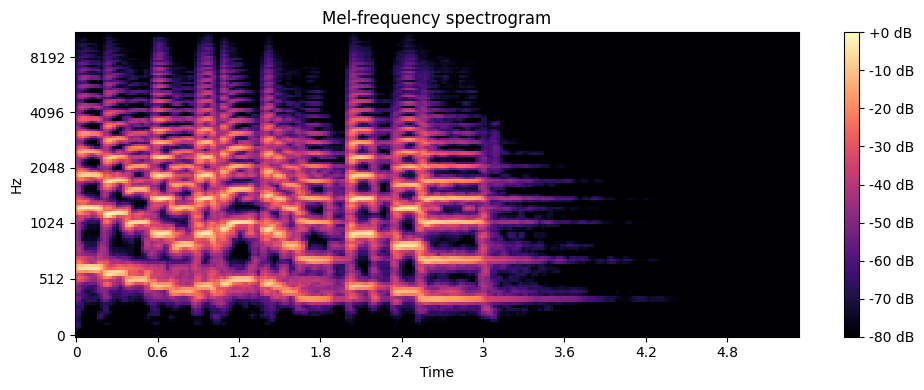

In [4]:
# Example of generating a spectrogram
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
y, sr = librosa.load(librosa.ex('trumpet'))

# Create a Mel-spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [46]:
# Assuming the file path is correct and the file exists
metadata_path = '/kaggle/input/birdclef-2024/train_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display the first few rows of the dataframe
display(metadata.head())

# Display basic information about the dataframe
print(metadata.info())

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24459 entries, 0 to 24458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     24459 non-null  object 
 1   secondary_labels  24459 non-null  object 
 2   type              24459 non-null  object 
 3   latitude          24081 non-null  float64
 4   longitude         24081 non-null  float64
 5   scientific_name   24459 non-null  object 
 6   common_name       24459 non-null  object 
 7   author            24459 non-null  object 
 8   license           24459 non-null  object 
 9   rating            24459 non-null  float64
 10  url               24459 non-null  object 
 11  filename          24459 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.2+ MB
None


In [47]:
import pandas as pd

# Load the metadata
metadata_path = '/kaggle/input/birdclef-2024/train_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Apply the expanded geographic filter for the Western Ghats and surrounding migratory areas
western_ghats_birds = metadata[
    (metadata['latitude'].between(8, 20)) &
    (metadata['longitude'].between(72, 80))
]

# Handle missing values if necessary (drop or impute)
western_ghats_birds = western_ghats_birds.dropna(subset=['latitude', 'longitude'])

# Print the new DataFrame to verify the filter and see the first few rows
print(western_ghats_birds.head())
print(western_ghats_birds.info())

# Optional: Save this DataFrame to a new CSV for easier access or further analysis
output_path = '/kaggle/working/western_ghats_birds.csv'
western_ghats_birds.to_csv(output_path, index=False)
print(f"DataFrame saved to {output_path}")

   primary_label secondary_labels                                type  \
4         asbfly               []                            ['call']   
5         asbfly               []                            ['call']   
11        asbfly               []                            ['call']   
32        asbfly               []                            ['call']   
58        asbfly               []  ['adult', 'call', 'sex uncertain']   

    latitude  longitude     scientific_name             common_name  \
4    15.5442    73.7733  Muscicapa dauurica  Asian Brown Flycatcher   
5    15.5442    73.7733  Muscicapa dauurica  Asian Brown Flycatcher   
11   10.1653    76.5476  Muscicapa dauurica  Asian Brown Flycatcher   
32   10.3526    77.5744  Muscicapa dauurica  Asian Brown Flycatcher   
58   10.0825    78.2164  Muscicapa dauurica  Asian Brown Flycatcher   

                               author  \
4   Albert Lastukhin & Sergei Karpeev   
5   Albert Lastukhin & Sergei Karpeev   
11         

In [48]:
import pandas as pd

# Assuming df is already loaded
df_path = '/kaggle/working/western_ghats_birds.csv'
df = pd.read_csv(df_path)

# Drop unnecessary columns
df = df.drop(['author', 'license', 'rating', 'url', 'secondary_labels', 'type'], axis=1)

# Optionally, save the trimmed DataFrame for further use
trimmed_df_path = '/kaggle/working/western_ghats_birds_trimmed.csv'
df.to_csv(trimmed_df_path, index=False)

print("Trimmed DataFrame saved:", trimmed_df_path)
print(df.head())  # Show the first few entries of the trimmed DataFrame


Trimmed DataFrame saved: /kaggle/working/western_ghats_birds_trimmed.csv
  primary_label  latitude  longitude     scientific_name  \
0        asbfly   15.5442    73.7733  Muscicapa dauurica   
1        asbfly   15.5442    73.7733  Muscicapa dauurica   
2        asbfly   10.1653    76.5476  Muscicapa dauurica   
3        asbfly   10.3526    77.5744  Muscicapa dauurica   
4        asbfly   10.0825    78.2164  Muscicapa dauurica   

              common_name             filename  
0  Asian Brown Flycatcher  asbfly/XC209218.ogg  
1  Asian Brown Flycatcher  asbfly/XC209219.ogg  
2  Asian Brown Flycatcher  asbfly/XC291450.ogg  
3  Asian Brown Flycatcher  asbfly/XC453302.ogg  
4  Asian Brown Flycatcher  asbfly/XC687953.ogg  


In [49]:
import librosa

base_audio_dir = '/kaggle/input/birdclef-2024/train_audio'

def load_audio_data(row):
    file_path = os.path.join(base_audio_dir, row['filename'])
    audio, sr = librosa.load(file_path)
    return audio, sr

# Example of loading audio for the first few filtered entries
for index, row in filtered_metadata.head().iterrows():
    audio, sr = load_audio_data(row)
    print(f"Loaded audio from {row['filename']} with sample rate {sr}")


Loaded audio from asbfly/XC209218.ogg with sample rate 22050
Loaded audio from asbfly/XC209219.ogg with sample rate 22050
Loaded audio from asbfly/XC291450.ogg with sample rate 22050
Loaded audio from asbfly/XC453302.ogg with sample rate 22050
Loaded audio from ashdro1/XC120586.ogg with sample rate 22050


In [50]:
import os
import shutil
import pandas as pd

# Load the DataFrame
df_path = '/kaggle/working/western_ghats_birds.csv'
western_ghats_birds = pd.read_csv(df_path)

# Base directory where original audio files are stored
base_audio_dir = '/kaggle/input/birdclef-2024/train_audio'

# Directory to store the copied audio files
target_dir = '/kaggle/working/processed_embeddings/western_ghats_bird_calls'
os.makedirs(target_dir, exist_ok=True)

# Initialize a counter for copied files
files_copied = 0

# Iterate through the DataFrame and copy files
for idx, row in western_ghats_birds.iterrows():
    src_path = os.path.join(base_audio_dir, row['filename'])
    if os.path.exists(src_path):
        # Ensure the target subdirectory exists
        subfolder_path = os.path.join(target_dir, os.path.dirname(row['filename']))
        os.makedirs(subfolder_path, exist_ok=True)

        # Define the destination path
        dest_path = os.path.join(target_dir, row['filename'])

        # Copy the file, replacing it if it already exists
        shutil.copy2(src_path, dest_path)  # Use copy2 for better handling of metadata and overwriting
        files_copied += 1  # Increment the counter
        print(f"Copied and replaced if existing: {src_path} to {dest_path}")
    else:
        print(f"File not found: {src_path}")

# Print the total number of files copied
print(f"All specified audio files have been processed. Total files copied or replaced: {files_copied}")


Copied and replaced if existing: /kaggle/input/birdclef-2024/train_audio/asbfly/XC209218.ogg to /kaggle/working/processed_embeddings/western_ghats_bird_calls/asbfly/XC209218.ogg
Copied and replaced if existing: /kaggle/input/birdclef-2024/train_audio/asbfly/XC209219.ogg to /kaggle/working/processed_embeddings/western_ghats_bird_calls/asbfly/XC209219.ogg
Copied and replaced if existing: /kaggle/input/birdclef-2024/train_audio/asbfly/XC291450.ogg to /kaggle/working/processed_embeddings/western_ghats_bird_calls/asbfly/XC291450.ogg
Copied and replaced if existing: /kaggle/input/birdclef-2024/train_audio/asbfly/XC453302.ogg to /kaggle/working/processed_embeddings/western_ghats_bird_calls/asbfly/XC453302.ogg
Copied and replaced if existing: /kaggle/input/birdclef-2024/train_audio/asbfly/XC687953.ogg to /kaggle/working/processed_embeddings/western_ghats_bird_calls/asbfly/XC687953.ogg
Copied and replaced if existing: /kaggle/input/birdclef-2024/train_audio/asbfly/XC687954.ogg to /kaggle/workin

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GRU, Dense, Flatten, TimeDistributed, Dropout

def create_crnn_model(input_shape, number_of_classes):
    """Creates a Convolutional Recurrent Neural Network (CRNN) model.

    Args:
        input_shape (tuple): The shape of the input spectrogram (height, width, channels).
        number_of_classes (int): The number of bird species to classify.

    Returns:
        A compiled Keras model.
    """
    model = Sequential([
        # First conv layer
        Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Second conv layer
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Third conv layer
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Fourth conv layer
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Flatten the output to feed into the RNN
        TimeDistributed(Flatten()),

        # Recurrent layer
        GRU(128, return_sequences=True),
        Dropout(0.5),
        GRU(128),

        # Output layer
        Dense(number_of_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Example usage
input_shape = (128, 128, 1)  # Adjust as per the spectrogram dimensions
number_of_classes = 264  # Example: number of bird species
model = create_crnn_model(input_shape, number_of_classes)

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 16)      160       
                                                                 
 batch_normalization_2 (Bat  (None, 128, 128, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_3 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     2525 non-null   object 
 1   secondary_labels  2525 non-null   object 
 2   type              2525 non-null   object 
 3   latitude          2525 non-null   float64
 4   longitude         2525 non-null   float64
 5   scientific_name   2525 non-null   object 
 6   common_name       2525 non-null   object 
 7   author            2525 non-null   object 
 8   license           2525 non-null   object 
 9   rating            2525 non-null   float64
 10  url               2525 non-null   object 
 11  filename          2525 non-null   object 
dtypes: float64(3), object(9)
memory usage: 236.8+ KB
None
  primary_label secondary_labels                                type  \
0        asbfly               []                            ['call']   
1        asbfly               []

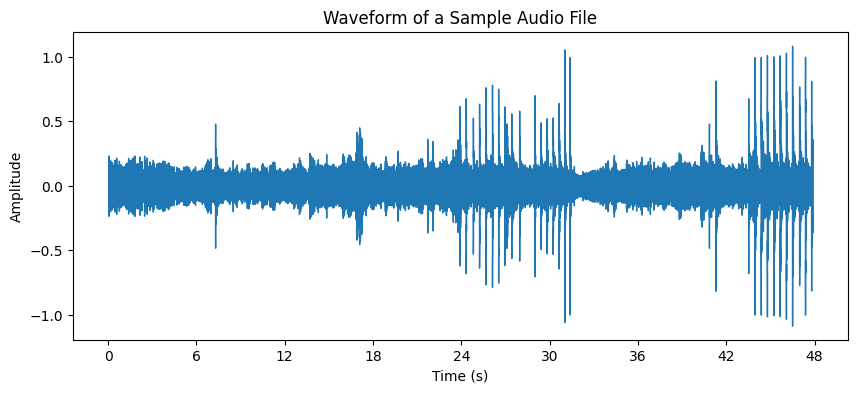

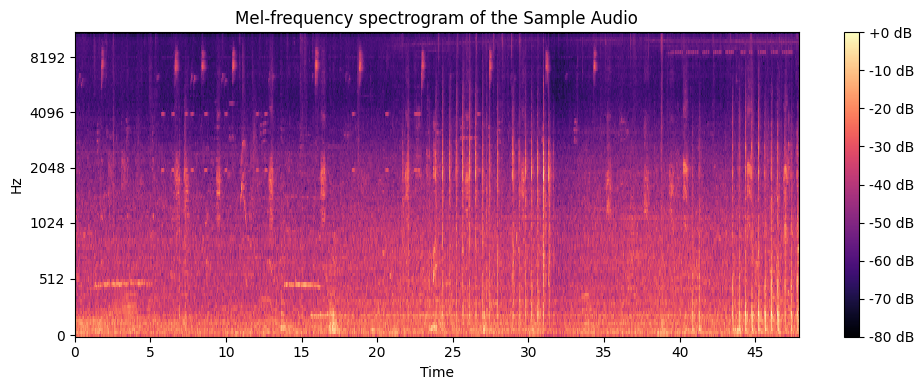

In [57]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the metadata
metadata_path = '/kaggle/working/western_ghats_birds.csv'
metadata = pd.read_csv(metadata_path)

extra_data_path = '/kaggle/input/birdclef-2024/eBird_Taxonomy_v2021.csv'
extra_data = pd.read_csv(extra_data_path)

# Display basic info and the first few rows of the DataFrame
print(metadata.info())
print(metadata.head())
print(extra_data.info())
print(extra_data.head())

# Analyze the distribution of the 'primary_label' to understand class balance
print(metadata['primary_label'].value_counts())

sample_audio_path_full = f"/kaggle/working/processed_embeddings/western_ghats_bird_calls/{metadata.loc[0, 'filename']}"

# Load and display a sample audio file
audio_data, sample_rate = librosa.load(sample_audio_path_full)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y=audio_data, sr=sample_rate)
plt.title('Waveform of a Sample Audio File')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram
S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128)
S_DB = librosa.power_to_db(S=S, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram of the Sample Audio')
plt.tight_layout()
plt.show()

In [58]:
import pandas as pd

# Load the metadata from CSV
metadata_path = '/kaggle/working/western_ghats_birds.csv'
metadata = pd.read_csv(metadata_path)

# Filter metadata for high-quality audio files (ratings 4 or higher)
high_quality_audio = metadata[metadata['rating'] >= 4.0]

# Save filtered metadata to a new CSV for easy access and record keeping
filtered_metadata_path = '/kaggle/working/high_quality_western_ghats_birds.csv'
high_quality_audio.to_csv(filtered_metadata_path, index=False)


In [62]:
import os
import librosa
import numpy as np
from PIL import Image

def generate_and_save_spectrogram(audio_path, output_path, target_size=(128, 128)):
    # Load the audio file with librosa
    y, sr = librosa.load(path=audio_path, sr=None)
    # Generate the Mel spectrogram with all arguments specified as keywords
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    # Convert the power spectrogram to decibel units, fully keyworded
    S_DB = librosa.power_to_db(S=S, ref=np.max)
    # Normalize the spectrogram to 0-255 and convert to image
    img = Image.fromarray(np.uint8((S_DB - S_DB.min()) / (S_DB.max() - S_DB.min()) * 255))
    img = img.resize(target_size)
    img.save(output_path)

def process_audio_files(metadata_df, base_dir, output_dir):
    # Ensure the base output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Process each file in the DataFrame
    for _, row in metadata_df.iterrows():
        # Construct the full path for each audio file
        audio_path = os.path.join(base_dir, row['filename'])
        if os.path.exists(audio_path):
            # Create the subdirectory structure within the output directory
            subfolder_path = os.path.join(output_dir, os.path.dirname(row['filename']))
            os.makedirs(subfolder_path, exist_ok=True)

            # Construct the output path with the correct file extension
            output_path = os.path.join(subfolder_path, os.path.splitext(os.path.basename(row['filename']))[0] + '.png')
            generate_and_save_spectrogram(audio_path, output_path)

# Define directories
base_audio_dir = '/kaggle/working/processed_embeddings/western_ghats_bird_calls'
output_spectrogram_dir = '/kaggle/working/spectrograms'

# Process high-quality audio files
process_audio_files(high_quality_audio, base_audio_dir, output_spectrogram_dir)


Distribution of bird species (primary labels):
primary_label
whcbar1    43
asikoe2    42
grejun2    42
blhori1    41
ashpri1    36
           ..
categr      1
chbeat1     1
tilwar1     1
comfla1     1
grehor1     1
Name: count, Length: 158, dtype: int64


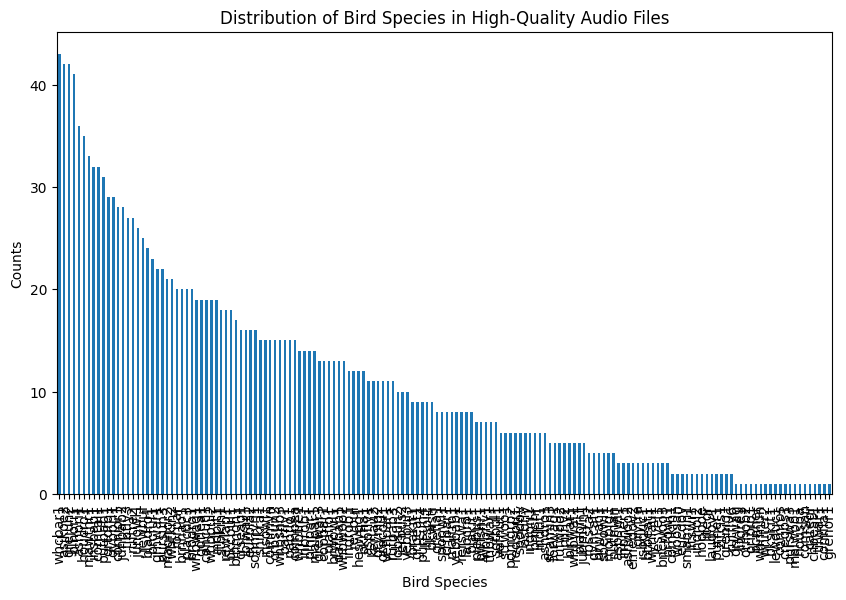

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the filtered metadata was saved correctly
filtered_metadata_path = '/kaggle/working/high_quality_western_ghats_birds.csv'

# Load filtered high-quality metadata
filtered_metadata = pd.read_csv(filtered_metadata_path)

# Display the distribution of primary labels
label_counts = filtered_metadata['primary_label'].value_counts()
print("Distribution of bird species (primary labels):")
print(label_counts)

# Plotting the distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Bird Species in High-Quality Audio Files')
plt.xlabel('Bird Species')
plt.ylabel('Counts')
plt.show()

